In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\Projects 24_Aircraft Manufacture Productions Analysis\aircraft_data.csv")
df

,Unnamed: 0,aircraft,nbBuilt,startDate,endDate,retired
0,0,Gotha G.III,25,1916,1916.0,NaN
1,1,Macchi C.205,262,1942,1944.0,1950
2,2,Antonov An-30,123,1971,1980.0,NaN
3,3,Blohm & Voss Ha 137,6,1935,1937.0,NaN
4,4,Panavia Tornado,992,1979,1998.0,NaN
...,...,...,...,...,...,...
1261,1261,Cessna 195,1180,1947,1954.0,NaN
1262,1262,Short Singapore,37,1934,1937.0,"Retired by RAF in 1941, last flight flown by R..."
1263,1263,Porterfield Collegiate,476,1936,1941.0,NaN
1264,1264,Tupolev Tu-123,52,1964,1972.0,1979


In [4]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (1266, 6)


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1266 non-null   int64  
 1   aircraft    1266 non-null   object 
 2   nbBuilt     1266 non-null   int64  
 3   startDate   1266 non-null   int64  
 4   endDate     997 non-null    float64
 5   retired     348 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 59.5+ KB


,Unnamed: 0,nbBuilt,startDate,endDate
count,1266.000000,1266.000000,1266.000000,997.000000
mean,632.500000,1252.535545,1929.436019,1930.302909
std,365.607029,3618.899938,224.918816,227.826756
min,0.000000,0.000000,1.000000,1.000000
25%,316.250000,32.250000,1937.000000,1938.000000
50%,632.500000,185.000000,1951.000000,1949.000000
75%,948.750000,703.000000,1974.750000,1979.000000
max,1265.000000,43400.000000,2015.000000,2016.000000


In [7]:
# Tampilkan informasi awal
print("Data awal:", df.shape)
print(df.info())
print(df.head())

Data awal: (1266, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1266 non-null   int64  
 1   aircraft    1266 non-null   object 
 2   nbBuilt     1266 non-null   int64  
 3   startDate   1266 non-null   int64  
 4   endDate     997 non-null    float64
 5   retired     348 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 59.5+ KB
None
   Unnamed: 0             aircraft  nbBuilt  startDate  endDate retired
0           0          Gotha G.III       25       1916   1916.0     NaN
1           1         Macchi C.205      262       1942   1944.0    1950
2           2        Antonov An-30      123       1971   1980.0     NaN
3           3  Blohm & Voss Ha 137        6       1935   1937.0     NaN
4           4      Panavia Tornado      992       1979   1998.0     NaN


In [8]:
# Deteksi duplikat
duplicates = df.duplicated()
print("Jumlah data duplikat:", duplicates.sum())

Jumlah data duplikat: 0


In [9]:
# Deteksi missing values
missing = df.isnull().sum()
print("Missing values per kolom:")
print(missing)

Missing values per kolom:
Unnamed: 0      0
aircraft        0
nbBuilt         0
startDate       0
endDate       269
retired       918
dtype: int64


In [10]:
# Fungsi untuk mendeteksi outliers menggunakan metode IQR
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

In [11]:
# Mendeteksi outliers pada kolom numerik
outliers_nbBuilt = detect_outliers("nbBuilt")
outliers_startDate = detect_outliers("startDate")
outliers_endDate = detect_outliers("endDate")
print("Jumlah outliers pada nbBuilt:", outliers_nbBuilt.shape[0])
print("Jumlah outliers pada startDate:", outliers_startDate.shape[0])
print("Jumlah outliers pada endDate:", outliers_endDate.shape[0])

Jumlah outliers pada nbBuilt: 172
Jumlah outliers pada startDate: 18
Jumlah outliers pada endDate: 14


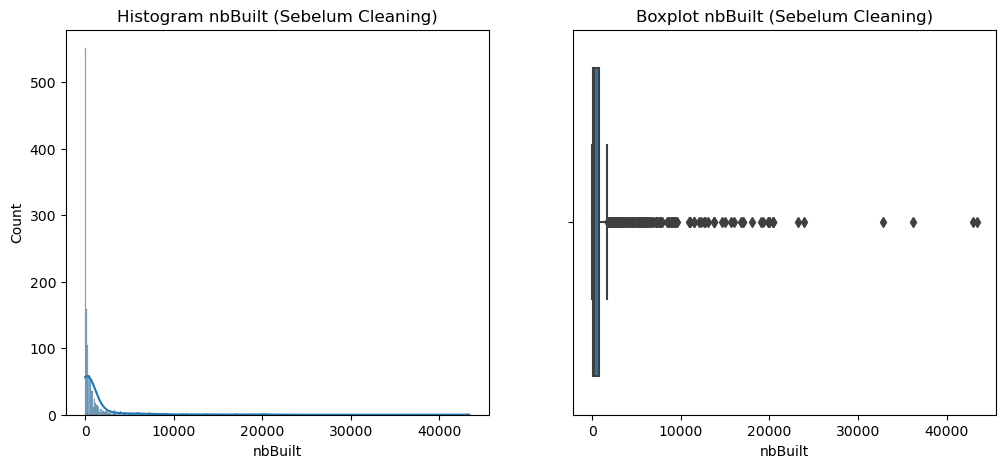

In [12]:
# Visualisasi Histogram dan Boxplot untuk kolom 'nbBuilt' (sebelum cleaning)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df["nbBuilt"], kde=True)
plt.title("Histogram nbBuilt (Sebelum Cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df["nbBuilt"])
plt.title("Boxplot nbBuilt (Sebelum Cleaning)")
plt.show()

In [13]:
# --- Data Cleaning ---

# Hapus duplikat
df_clean = df.drop_duplicates()

# Hapus baris dengan missing values
df_clean = df_clean.dropna()

# Hapus outliers untuk kolom numerik
for col in ["nbBuilt", "startDate", "endDate"]:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Data setelah cleaning:", df_clean.shape)

Data setelah cleaning: (250, 6)


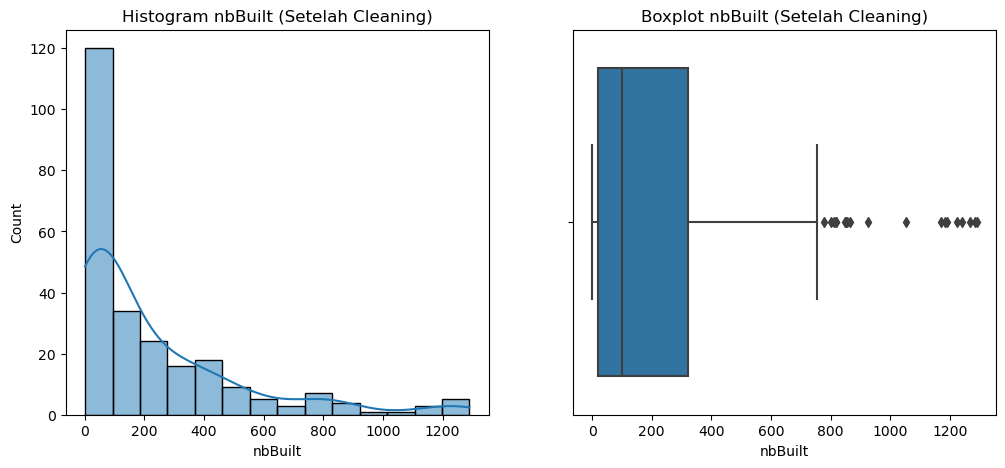

Statistik Deskriptif Data Awal:
        Unnamed: 0       nbBuilt    startDate      endDate
count  1266.000000   1266.000000  1266.000000   997.000000
mean    632.500000   1252.535545  1929.436019  1930.302909
std     365.607029   3618.899938   224.918816   227.826756
min       0.000000      0.000000     1.000000     1.000000
25%     316.250000     32.250000  1937.000000  1938.000000
50%     632.500000    185.000000  1951.000000  1949.000000
75%     948.750000    703.000000  1974.750000  1979.000000
max    1265.000000  43400.000000  2015.000000  2016.000000

Statistik Deskriptif Data Cleaned:
        Unnamed: 0      nbBuilt   startDate      endDate
count   250.000000   250.000000   250.00000   250.000000
mean    630.808000   225.700000  1941.38000  1945.484000
std     355.708675   291.264674    12.20292    14.647729
min       1.000000     1.000000  1913.00000  1915.000000
25%     345.000000    20.000000  1934.00000  1936.000000
50%     648.500000   101.000000  1940.00000  1943.500000
75

In [14]:
# Visualisasi Histogram dan Boxplot untuk kolom 'nbBuilt' (setelah cleaning)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_clean["nbBuilt"], kde=True)
plt.title("Histogram nbBuilt (Setelah Cleaning)")

plt.subplot(1,2,2)
sns.boxplot(x=df_clean["nbBuilt"])
plt.title("Boxplot nbBuilt (Setelah Cleaning)")
plt.show()

# Perbandingan statistik deskriptif
print("Statistik Deskriptif Data Awal:")
print(df.describe())
print("\nStatistik Deskriptif Data Cleaned:")
print(df_clean.describe())

# Simpan dataset yang telah dibersihkan
df_clean.to_csv("aircraft_data-cleaned.csv", index=False)

In [15]:
# Menghitung metrik
distinct_brands = df_clean["aircraft"].nunique()
# Hitung umur sebagai selisih antara endDate dan startDate
df_clean["age"] = df_clean["endDate"] - df_clean["startDate"]
average_age = df_clean["age"].mean()
total_productions = df_clean["nbBuilt"].sum()

print("Jumlah merek aircraft:", distinct_brands)
print("Rata-rata umur aircraft:", average_age)
print("Total produksi aircraft:", total_productions)

Jumlah merek aircraft: 250
Rata-rata umur aircraft: 4.104
Total produksi aircraft: 56425


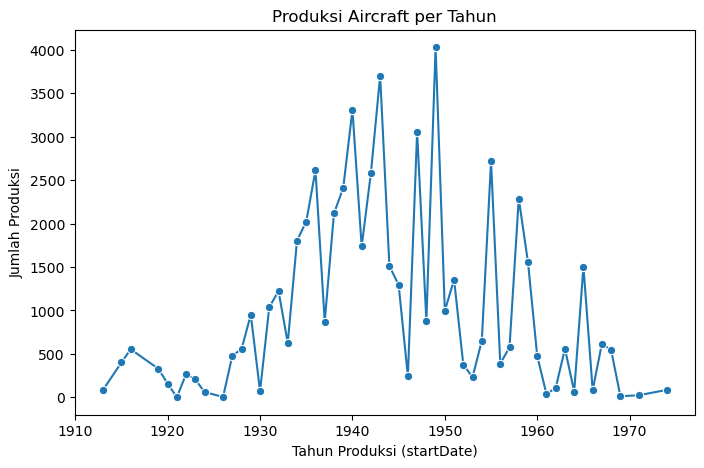

In [16]:
# Line Chart: Produksi Aircraft Per Tahun
productions_per_year = df_clean.groupby("startDate")["nbBuilt"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=productions_per_year, x="startDate", y="nbBuilt", marker="o")
plt.title("Produksi Aircraft per Tahun")
plt.xlabel("Tahun Produksi (startDate)")
plt.ylabel("Jumlah Produksi")
plt.show()

In [19]:
# Rata-rata Umur Aircraft per Merek
# Menghitung umur aircraft sebagai selisih antara endDate dan startDate
df['age'] = df['endDate'] - df['startDate']

# Menghitung rata-rata umur per brand dan mengonversi hasilnya menjadi DataFrame
avg_age_df = df.groupby('aircraft', as_index=False)['age'].mean()
avg_age_df.columns = ['Brand', 'Average Age']

# Menampilkan tabel
print(avg_age_df)


                                 Brand  Average Age
0                         AD Navyplane          0.0
1                           AEA Cygnet          5.0
2                         AEA June Bug          0.0
3                      AEA Silver Dart          0.0
4                       AEA White Wing          0.0
...                                ...          ...
1260                Zenith STOL CH 701          NaN
1261             Zeppelin-Staaken R.VI          2.0
1262  Zeppelin-Staaken Riesenflugzeuge          4.0
1263                        ZlÃ­n Z 37         22.0
1264                        ZlÃ­n Z 43          5.0

[1265 rows x 2 columns]


In [ ]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt

# # Membaca dataset bersih
# df_clean = pd.read_csv("aircraft_data-cleaned.csv")
# df_clean["age"] = df_clean["endDate"] - df_clean["startDate"]

# # Menghitung metrik
# distinct_brands = df_clean["aircraft"].nunique()
# average_age = df_clean["age"].mean()
# total_productions = df_clean["nbBuilt"].sum()

# # Siapkan data untuk grafik
# productions_per_year = df_clean.groupby("startDate")["nbBuilt"].sum().reset_index()
# avg_age_per_brand = df_clean.groupby("aircraft")["age"].mean().reset_index()

# st.title("Dashboard Analisis Data Aircraft")

# st.header("Ringkasan Data")
# st.write("**Jumlah Merek Aircraft:**", distinct_brands)
# st.write("**Rata-rata Umur Aircraft:**", round(average_age, 2))
# st.write("**Total Produksi Aircraft:**", total_productions)

# st.header("Grafik Produksi Aircraft per Tahun")
# st.line_chart(productions_per_year.set_index("startDate"))

# st.header("Grafik Rata-rata Umur Aircraft per Merek")
# st.bar_chart(avg_age_per_brand.set_index("aircraft"))

# st.header("Data Cleaned")
# st.dataframe(df_clean)
